In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
%matplotlib inline

Step1: Looking at the previous data

In [2]:
df_2022 = pd.read_csv('./previous_data/survey_results_public_2022.csv')
df_2021 = pd.read_csv('./previous_data/survey_results_public_2021.csv')
df_2020 = pd.read_csv('./previous_data/survey_results_public_2020.csv')
df_2019 = pd.read_csv('./previous_data/survey_results_public_2019.csv')
df_2018 = pd.read_csv('./previous_data/survey_results_public_2018.csv')
df_2017 = pd.read_csv('./previous_data/survey_results_public_2017.csv')
df_2016 = pd.read_csv('./previous_data/survey_results_public_2016.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
schema_df = pd.read_csv('./previous_data/survey_results_schema.csv')

Step2: Finding the similar columns in these datasets

In [4]:
int_cols_1 = np.intersect1d(list(df_2022.columns),list(df_2021.columns),list(df_2020.columns))
int_cols_2 = np.intersect1d(list(df_2019.columns),list(df_2018.columns),list(df_2017.columns))
int_cols_3 = np.intersect1d(int_cols_1,int_cols_2)

In [5]:
int_cols_3

array(['Age', 'Country', 'DevType', 'Employment', 'Gender'], 
      dtype='<U30')

In [6]:
int_cols_1

array(['Accessibility', 'Age', 'CompFreq', 'CompTotal',
       'ConvertedCompYearly', 'Country', 'Currency',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DevType',
       'EdLevel', 'Employment', 'Ethnicity', 'Gender',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LearnCode',
       'MainBranch', 'MentalHealth', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'NEWSOSites', 'OrgSize',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'ResponseId',
       'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'Sexuality',
       'SurveyEase', 'SurveyLength', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'Trans', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'YearsCode', 'YearsCodePro'], 
      dtype='<U30')

In [7]:
int_cols_4 = np.intersect1d(int_cols_1,list(df_2019.columns))
int_cols_4

array(['Age', 'CompFreq', 'CompTotal', 'Country', 'DevType', 'EdLevel',
       'Employment', 'Ethnicity', 'Gender', 'MainBranch', 'OrgSize',
       'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'Sexuality',
       'SurveyEase', 'SurveyLength', 'Trans', 'YearsCode', 'YearsCodePro'], 
      dtype='<U30')

From the above we can see that past four years have sufficient common columns to analyse and have results


Question1: Change in the trends of the desired technology to learn

In [50]:
#Data Preprocessing in MiscTechWantToWorkWith columns
def get_desired_tech(df, col,year):
    tech_df = df[col].dropna()
    tech_df = pd.get_dummies(tech_df.str.split(';',expand=True),prefix='',prefix_sep = '')
    tech_df = tech_df.groupby(lambda x:x, axis=1).sum()
    tech_df = tech_df.sum()
    tech_df = (tech_df/tech_df.sum()).sort_values(ascending=False).to_frame()
    return tech_df.rename(columns= {0: year}).T  

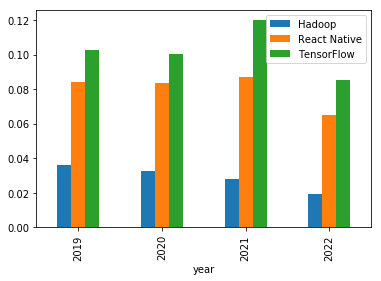

In [51]:

tech_2022 = get_desired_tech(df_2022,'MiscTechWantToWorkWith',2022)
tech_2021 = get_desired_tech(df_2021,'MiscTechWantToWorkWith',2021)
tech_2020 = get_desired_tech(df_2020,'MiscTechDesireNextYear',2020)
tech_2019 = get_desired_tech(df_2019,'MiscTechDesireNextYear',2019)

tech_df = tech_2019.append([tech_2020,tech_2021,tech_2022],sort='False').dropna(axis=1)
tech_df.reset_index(level=0, inplace=True)
tech_df = tech_df.rename(columns= {'index': 'year'})

tech_df.plot(x="year",y=['Hadoop','React Native','TensorFlow'], kind="bar")


Similarly if we try to find the trend of desired language to learn in the coming years

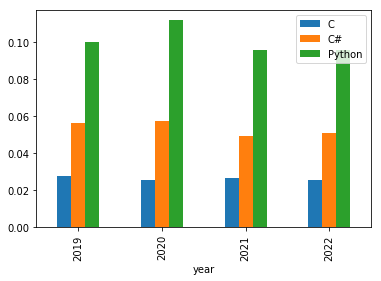

In [52]:
# Language desired next year LanguageDesireNextYear
lang_2022 = get_desired_tech(df_2022,'LanguageWantToWorkWith',2022)
lang_2021 = get_desired_tech(df_2021,'LanguageWantToWorkWith',2021)
lang_2020 = get_desired_tech(df_2020,'LanguageDesireNextYear',2020)
lang_2019 = get_desired_tech(df_2019,'LanguageDesireNextYear',2019)

lang_df = lang_2019.append([lang_2020,lang_2021,lang_2022],sort='False').dropna(axis=1)
lang_df.reset_index(level=0, inplace=True)
lang_df = lang_df.rename(columns= {'index': 'year'})

lang_df.plot(x="year",y=['C','C#','Python'], kind="bar")


Question2: Trends of Education 

In [26]:
# 3. Trends of EdLevel of ML?dataScience Job holder
def tech_in_ML(df,year):
    tech_df = pd.get_dummies(df['DevType'].str.split(';',expand=True),prefix='',prefix_sep = '')
    tech_df = tech_df.groupby(lambda x:x, axis=1).sum()
    updated_dev = pd.concat([df.drop('DevType',axis=1),tech_df],axis=1)
    ml_dev = updated_dev[updated_dev['Data scientist or machine learning specialist']==1]
    updated_sr = ml_dev.groupby('EdLevel')['EdLevel'].agg('count')
    updated_df = (updated_sr/ml_dev.shape[0]).sort_values(ascending= False)[:2].to_frame()
    return updated_df.rename(columns= {'EdLevel': year}).T 

In [27]:
ML_2022 = tech_in_ML(df_2022,2022)
ML_2021 = tech_in_ML(df_2021,2021)
ML_2020 = tech_in_ML(df_2020,2020)
ML_2019 = tech_in_ML(df_2019,2019)

ML_2020 = ML_2020.rename(columns = {'Bachelor’s degree (BA, BS, B.Eng., etc.)':'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
                         'Master’s degree (MA, MS, M.Eng., MBA, etc.)':'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'})

ML_2019 = ML_2019.rename(columns = {'Bachelor’s degree (BA, BS, B.Eng., etc.)':'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
                         'Master’s degree (MA, MS, M.Eng., MBA, etc.)':'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'})

ML_df = ML_2019.append([ML_2020,ML_2021,ML_2022],sort='False').dropna(axis=1)
ML_df.reset_index(level=0, inplace=True)
ML_df = ML_df.rename(columns= {'EdLevel': 'year'})

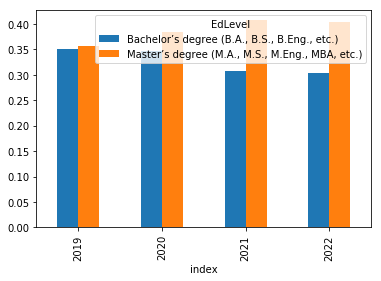

In [28]:
ML_df.plot(x="index",y=['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
                        'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'], kind="bar")

Question3: percentage of Women who code in start-ups

In [32]:
# 3. Startup culture having women who code trends
df_2022['StartUp'] = df_2022['OrgSize'].isin(['20 to 99 employees', 
                                             '100 to 499 employees','2 to 9 employees','10 to 19 employees',
                                             '500 to 999 employees'])

In [33]:
df_2022['OrgSize'].unique()

array([nan, '20 to 99 employees', '100 to 499 employees', 'I don’t know',
       'Just me - I am a freelancer, sole proprietor, etc.',
       '2 to 9 employees', '5,000 to 9,999 employees',
       '1,000 to 4,999 employees', '10,000 or more employees',
       '500 to 999 employees', '10 to 19 employees'], dtype=object)

In [38]:
women_trend = []
def women_data(df,col,arr_like,grp_col):
    df['new_col'] = df[col].isin(arr_like)
    grp_df = df[df['new_col']].groupby(grp_col)[grp_col].agg('count')
    return grp_df.get('Woman')/df[df['new_col']].shape[0]   

In [39]:
df = [df_2019,df_2020,df_2021,df_2022]
for idf in df:
    women_trend.append(women_data(idf,'OrgSize',['20 to 99 employees', 
                                             '100 to 499 employees','2 to 9 employees','10 to 19 employees',
                                             '500 to 999 employees'],'Gender'))

In [40]:
years = [2019,2020,2021,2022]

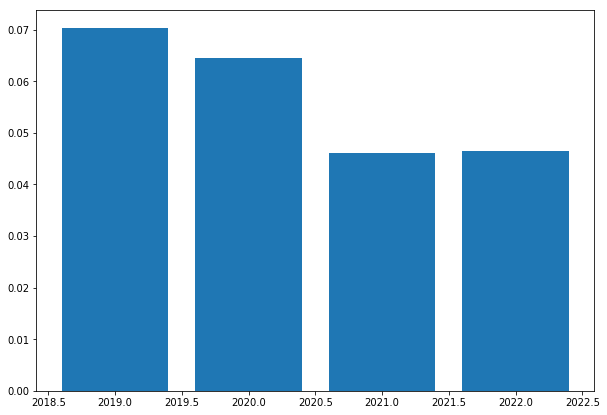

In [41]:
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(years, women_trend)
 
# Show Plot
plt.show()